# Contextual Bandits Agent with Policy Gradient Method (Stochastic) in Prediction Markets Problem
---
This is a program that simulates an agent who trades in a prediction market. The problem that the prediction market aims to solve is to predict the real distribution of a random variable. We define the random variable as the colour of a bucket. The problem design comes from a human-subjective experiment for decision markets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from main import stochastic_training_notebook
from Environment import ScoreFunction, DecisionRule

In [31]:
learning_rate_theta = 1e-4
learning_rate_wv = 1e-4
memory_size = 16
batch_size = 16
training_episodes = 900000
decay_rate = 0
beta1 = 0.9
beta2 = 0.9999
# Algorithm: adam, momentum, regular
algorithm = 'regular'
learning_std = False
fixed_std = 0.3
# Bucket parameters
pr_red_ball_red_bucket = 2/3
pr_red_ball_blue_bucket = 1/3
prior_red_list = [3/4, 1/4]
agent_num=1
action_num=2
preferred_colour_pr_list = [0.8, 0.2]
score_func = ScoreFunction.LOG
decision_rule = DecisionRule.STOCHASTIC

agent_list = stochastic_training_notebook(learning_rate_theta, learning_rate_wv,
                                 memory_size, batch_size, training_episodes,
                                 decay_rate, beta1, beta2, algorithm, learning_std,
                                 fixed_std, pr_red_ball_red_bucket, pr_red_ball_blue_bucket,
                                 prior_red_list, agent_num, action_num, score_func, decision_rule, preferred_colour_pr_list)

  0%|          | 0/900000 [00:00<?, ?it/s]

agent0
learning_rate_theta= 0.0001  learning_rate_wv= 0.0001
memory_size= 16  standard deviation= 0.3
Updating weights with regular algorithm.


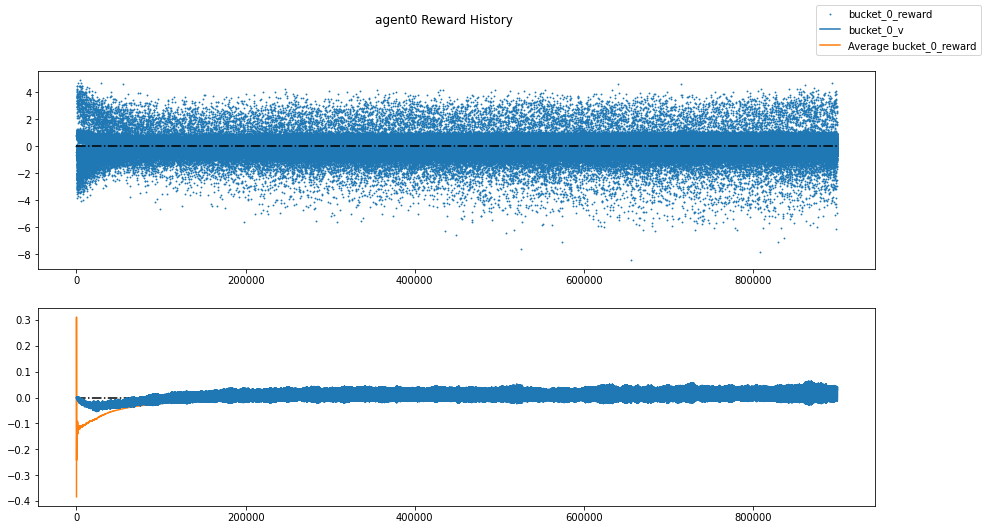

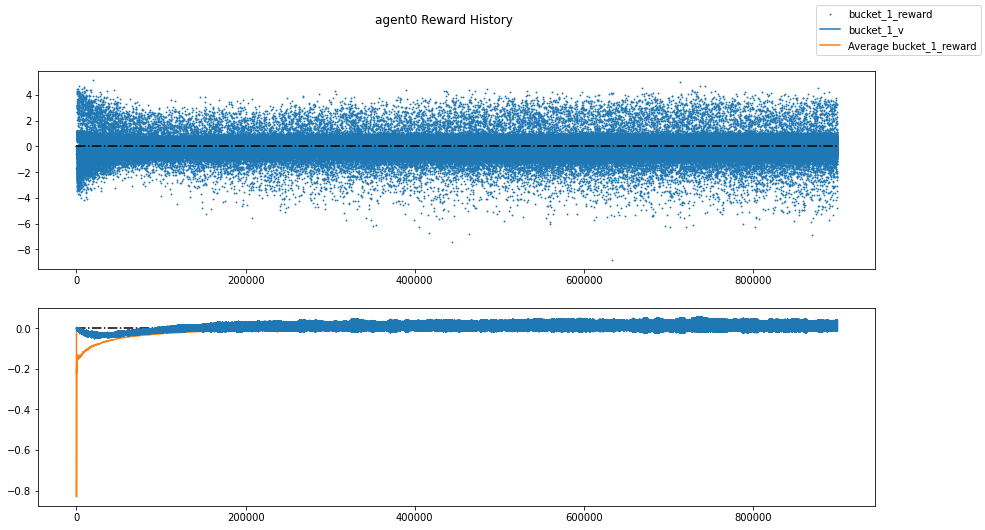

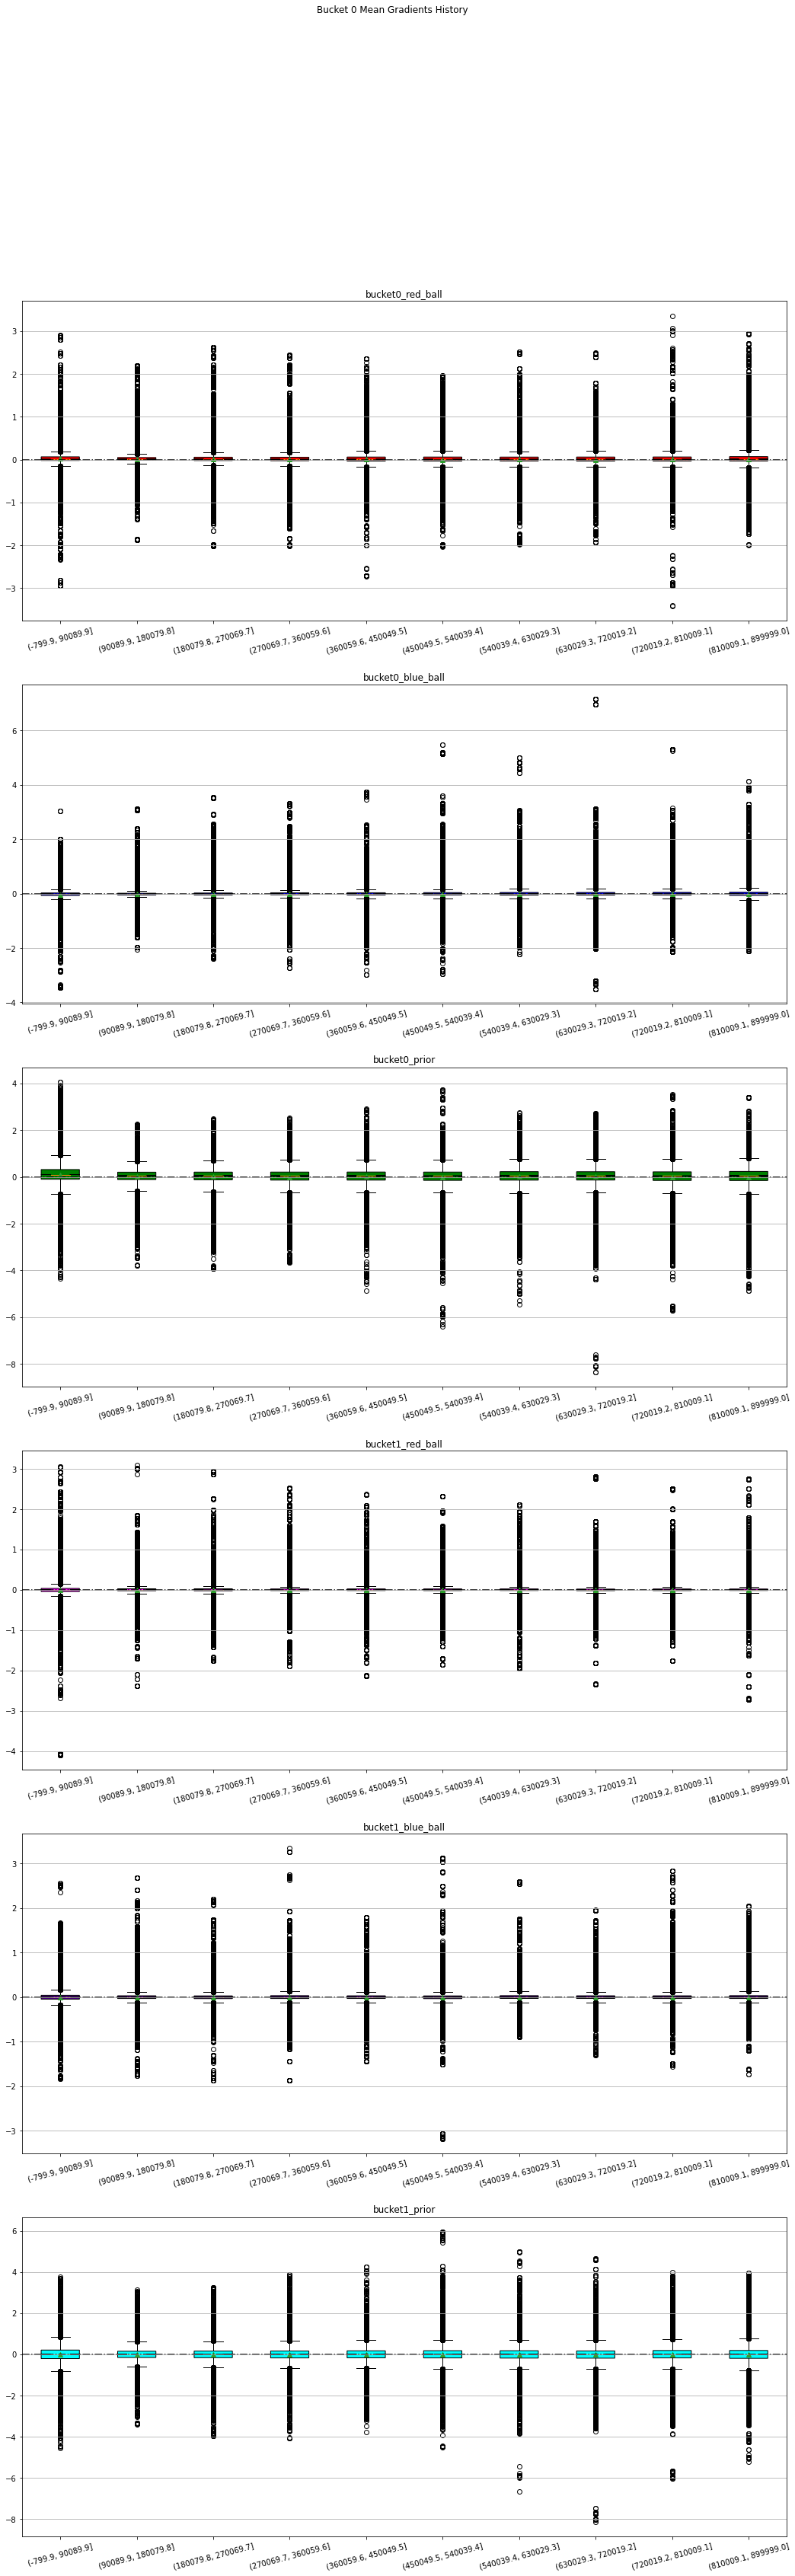

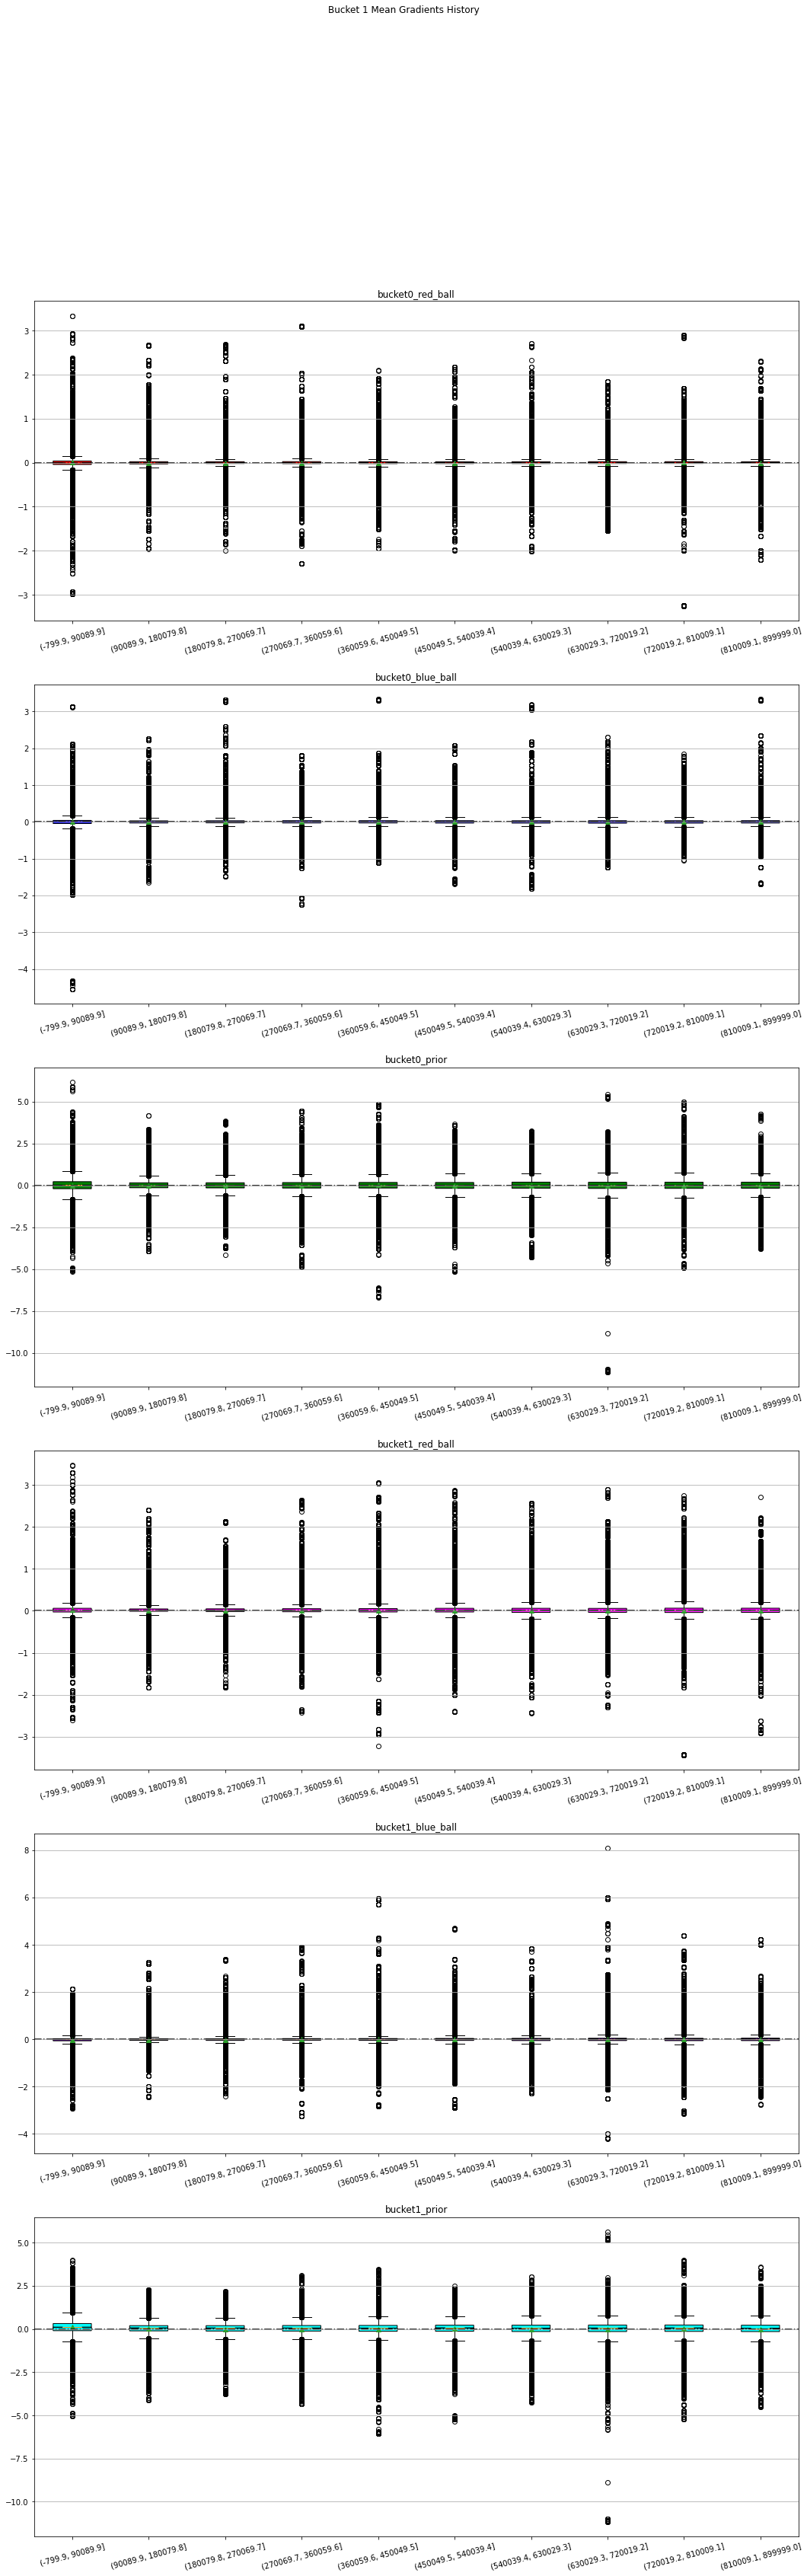

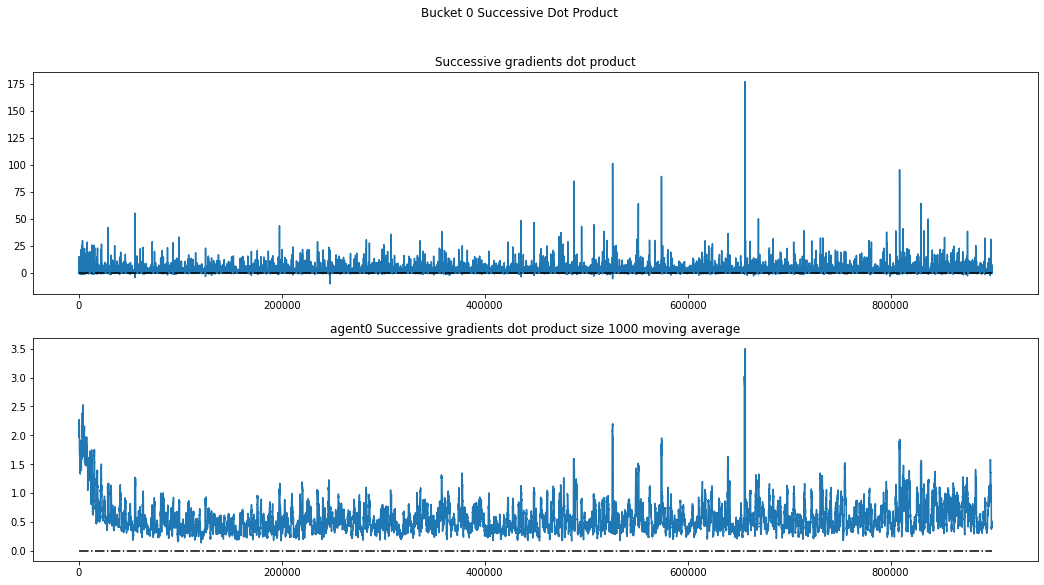

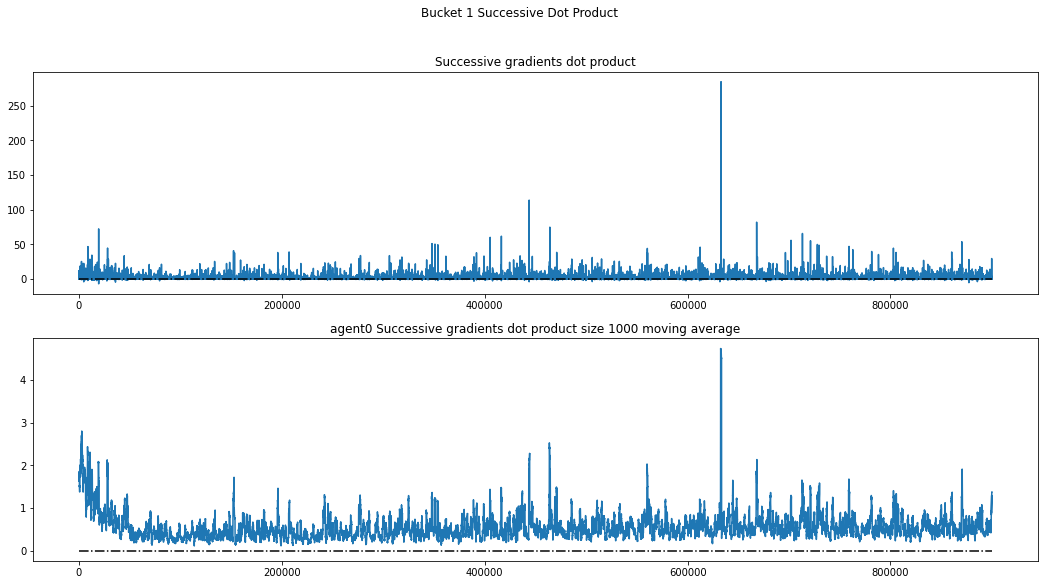

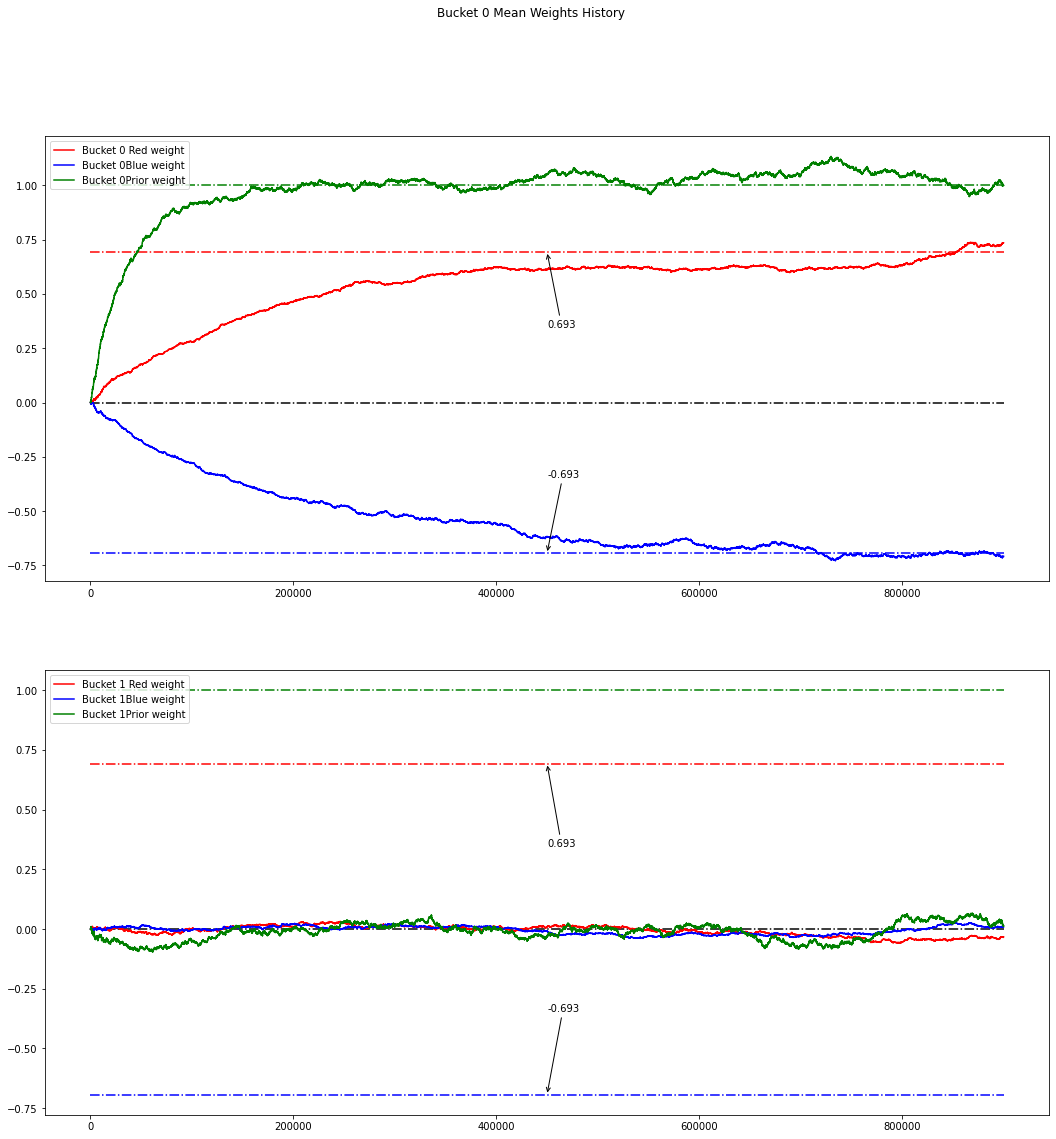

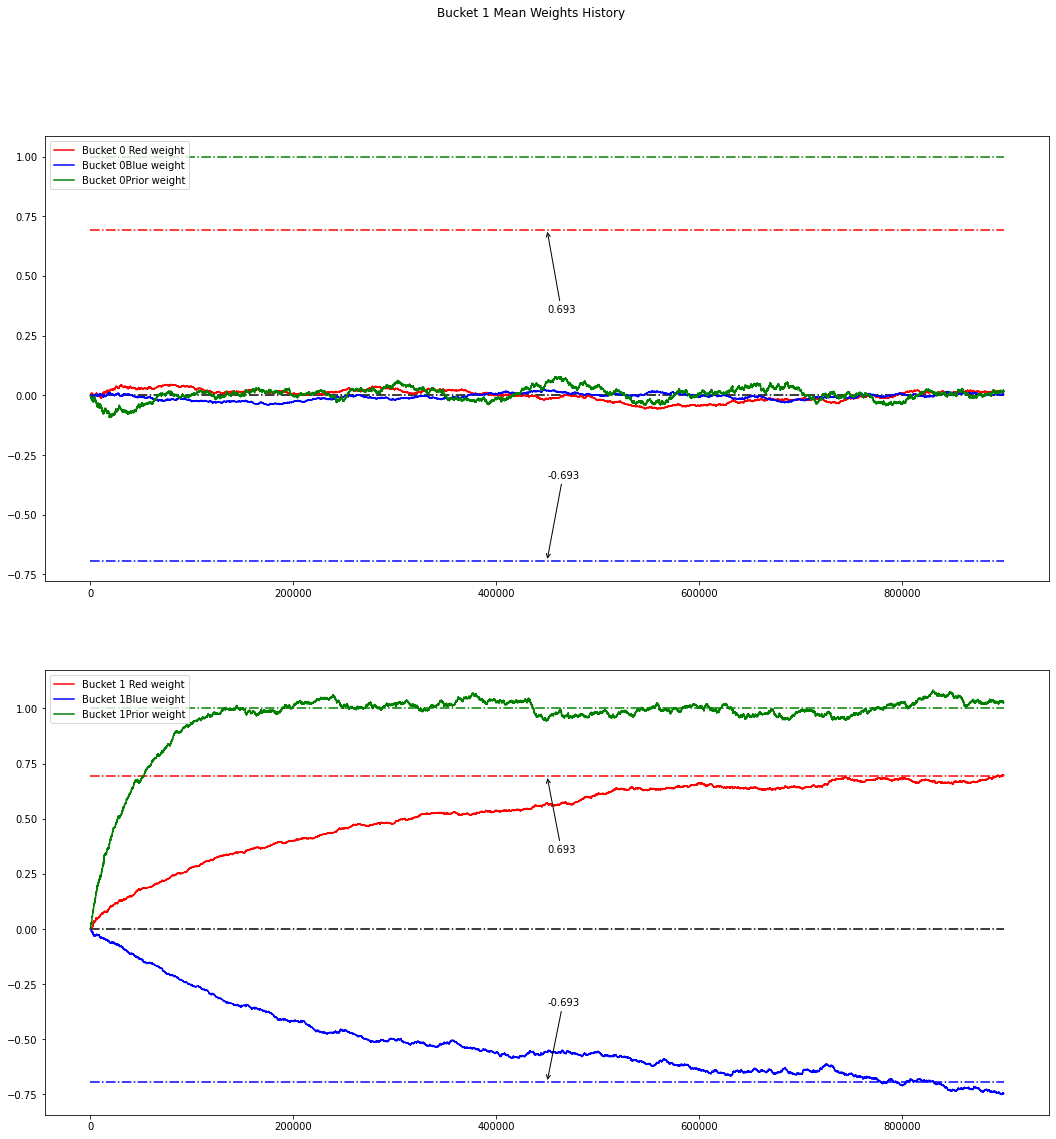

In [32]:
for agent in agent_list:
    agent.reward_history_plot()
#     agent.report_history_plot()
    agent.mean_gradients_history_plot()
    agent.mean_gradients_successive_dot_product_plot()
#     agent.mean_history_plot()
    agent.mean_weights_history_plot()

In [25]:
report_history_df = agent_list[0].report_history_dataframe()

In [26]:
report_history_df.tail(20)

,bucket_no,signal,bucket_0_prior,bucket_0_report,bucket_0_mean,bucket_0_best,bucket_1_prior,bucket_1_report,bucket_1_mean,bucket_1_best
299980,1,RED,0.75,0.710049,0.745532,0.750000,0.25,0.380832,0.327372,0.400000
299981,0,RED,0.75,0.791477,0.832493,0.857143,0.75,0.739110,0.750566,0.750000
299982,0,RED,0.75,0.842337,0.823155,0.857143,0.25,0.276218,0.226112,0.250000
299983,1,RED,0.25,0.287311,0.263294,0.250000,0.75,0.864025,0.841593,0.857143
299984,0,BLUE,0.25,0.144218,0.166320,0.142857,0.25,0.237764,0.244644,0.250000
299985,0,BLUE,0.75,0.654520,0.650917,0.600000,0.75,0.865664,0.758847,0.750000
299986,0,BLUE,0.25,0.196718,0.175623,0.142857,0.75,0.753559,0.769294,0.750000
299987,1,RED,0.75,0.793489,0.757771,0.750000,0.75,0.865604,0.833683,0.857143
299988,0,RED,0.75,0.869784,0.832513,0.857143,0.75,0.719914,0.750575,0.750000
299989,0,RED,0.25,0.472479,0.347159,0.400000,0.25,0.204553,0.236455,0.250000


In [27]:
import math
from scipy import stats
from scipy.special import logit, expit
from Environment import expected_log_reward_red_ball, analytical_best_report_ru_rs

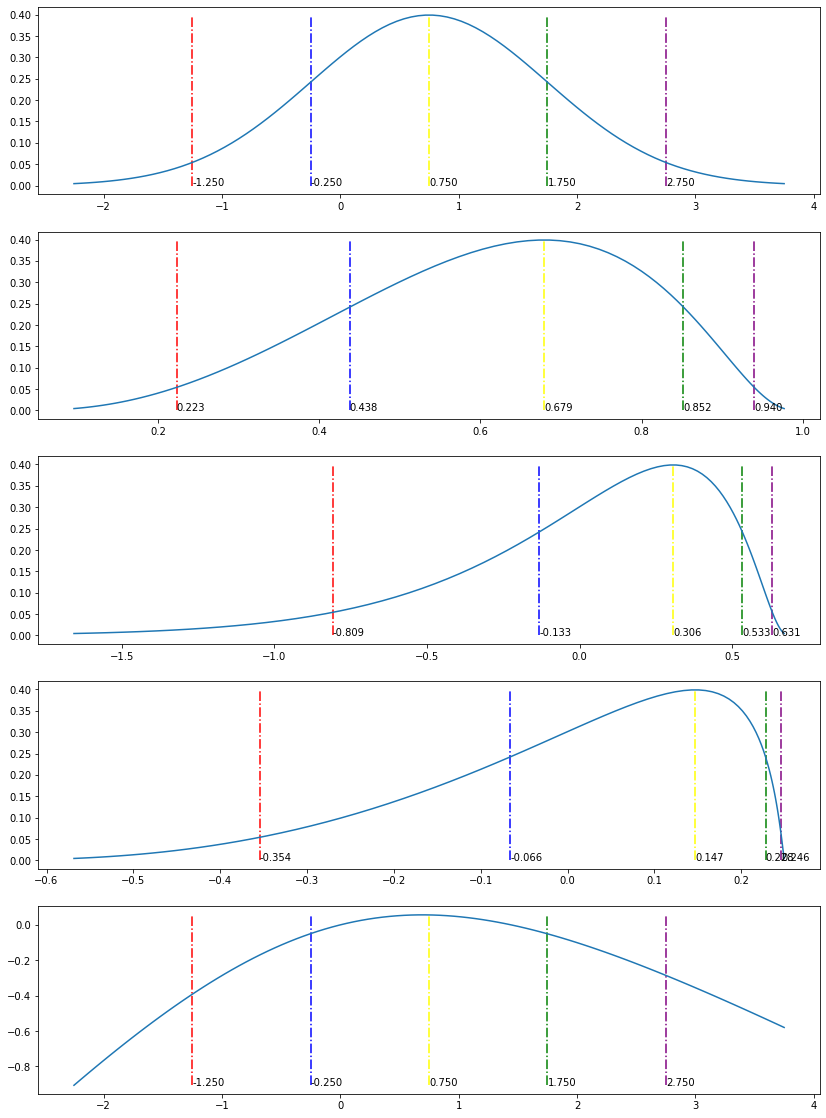

In [30]:
mu = 0.75
variance = 1
prior_red = 0.5
colours = ['red', 'blue', 'yellow', 'green', 'purple']
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
z = np.linspace(mu-2*sigma, mu+2*sigma, 5)
fig, axs = plt.subplots(5, figsize=(14, 4*5))
axs[0].plot(x, stats.norm.pdf(x, mu, sigma))
axs[0].vlines(z, ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(z, zip(z, [0]*5)):
    axs[0].annotate('%.3f'%value, xy=coord)
axs[1].plot(expit(x), stats.norm.pdf(x, mu, sigma))
axs[1].vlines(expit(z), ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(expit(z), zip(expit(z), [0]*5)):
    axs[1].annotate('%.3f'%value, xy=coord)
axs[2].plot(np.log(expit(x))-np.log(1/2), stats.norm.pdf(x, mu, sigma))
# axs[2].plot(np.log(1/2) - np.log(expit(x)), stats.norm.pdf(x, mu, sigma))
axs[2].vlines(np.log(expit(z))-np.log(1/2), ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(np.log(expit(z))-np.log(1/2), zip(np.log(expit(z))-np.log(1/2), [0]*5)):
    axs[2].annotate('%.3f'%value, xy=coord)
axs[3].plot(expit(x) - (np.square(expit(x)) + np.square(1 - expit(x)))/2 - 0.25, stats.norm.pdf(x, mu, sigma))
axs[3].vlines(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
for value, coord in zip(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, zip(expit(z) - (np.square(expit(z)) + np.square(1 - expit(z)))/2 - 0.25, [0]*5)):
    axs[3].annotate('%.3f'%value, xy=coord)
actual_pr_ru_rs = analytical_best_report_ru_rs(prior_red, pr_red_ball_red_bucket, pr_red_ball_blue_bucket)
expected_init = expected_log_reward_red_ball(actual_pr_ru_rs, 1/2, prior_red)
expected_z = expected_log_reward_red_ball(actual_pr_ru_rs, np.array(expit(z)), prior_red)
expected_x = expected_log_reward_red_ball(actual_pr_ru_rs, np.array(expit(x)), prior_red)
# axs[4].plot(expected_x-expected_init, stats.norm.pdf(x, mu, sigma))
# axs[4].vlines(expected_z-expected_init, ymin=0, ymax=np.max(stats.norm.pdf(x, mu, sigma)), linestyle='dashdot', colors=colours)
# for value, coord in zip(expected_z-expected_init, zip(expected_z-expected_init, [0]*5)):
#     axs[4].annotate('%.3f'%value, xy=coord)
axs[4].plot(x, expected_x-expected_init)
axs[4].vlines(z, ymin=np.min(expected_x-expected_init), ymax=np.max(expected_x-expected_init), linestyle='dashdot', colors=colours)
for value, coord in zip(z, zip(z, [np.min(expected_x-expected_init)]*5)):
    axs[4].annotate('%.3f'%value, xy=coord)
plt.show()

In [ ]:
if learning_std:
    min_std = report_history_df['std'].min()
    fig, ax = plt.subplots(figsize=(15, 4))
    for signal, df in report_history_df.reset_index().groupby('signal'):
        ax.scatter(x=df['index'], y=df['std'], label=signal, marker='.', c=signal, s=0.1)
    plt.hlines(y=0, xmin=0, xmax=len(report_history_df) , colors='black', linestyles='dashdot')
    plt.hlines(y=min_std, xmin=0, xmax=len(report_history_df) , colors='black', linestyles='dashdot', label=str(min_std))
    red_line = mlines.Line2D([], [], color='red', label='red signal')
    blue_line = mlines.Line2D([], [], color='blue', label='blue signal')
    ax.legend(handles=[red_line, blue_line])
    plt.title('Standard Diviation')
